In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
sns.set(font_scale=1)
sns.set_style("ticks")

In [5]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [6]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

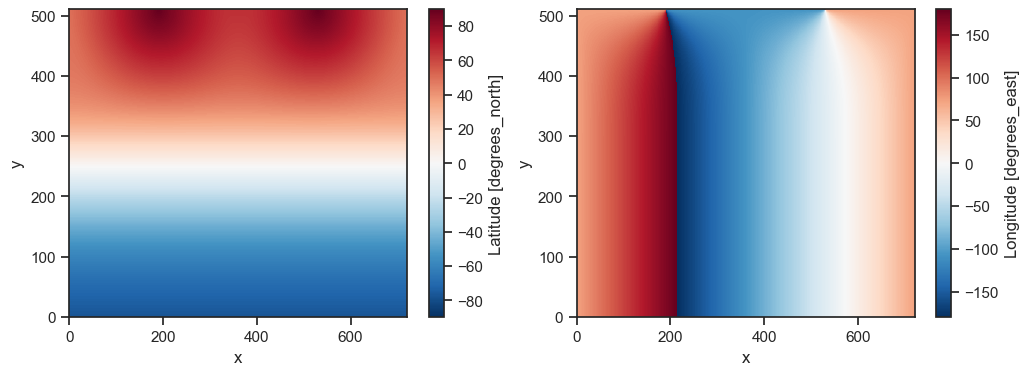

In [7]:
# plot coordinates

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

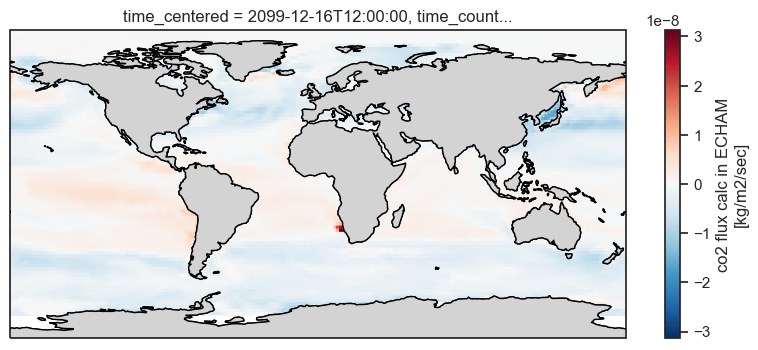

In [8]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

data.co2flux_cpl[1019].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

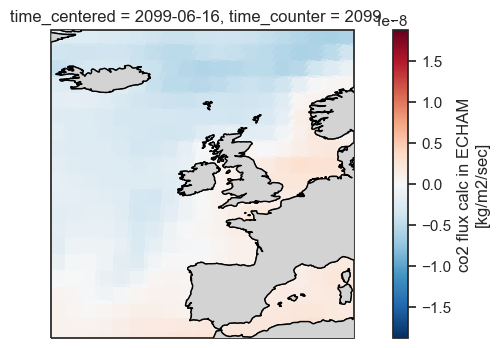

In [9]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

data.co2flux_cpl[1013].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([-25, 10, 35, 70]) # plot a region

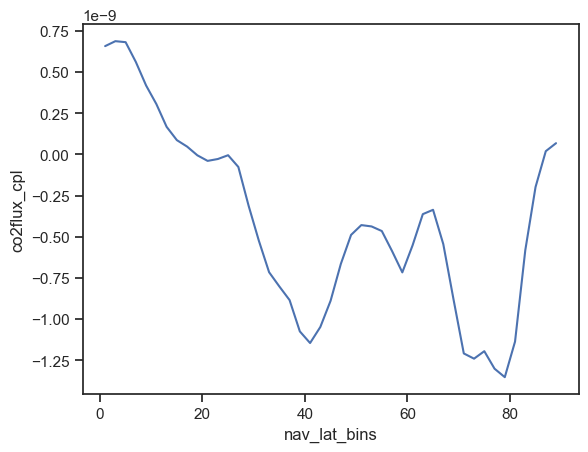

In [10]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

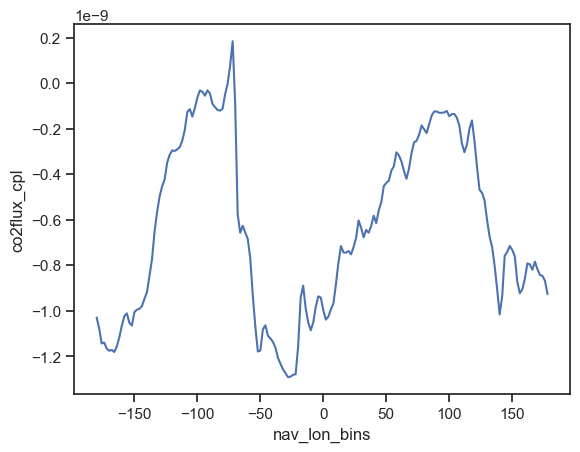

In [11]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

In [12]:
ds_date_range = data.sel(time_counter=slice('2090', '2100'))

In [13]:
df_range = ds_date_range.to_dataframe() 

In [14]:
df_range.describe() 

,nav_lat,nav_lon,co2flux_cpl
count,8.854608e+07,8.854608e+07,8.854608e+07
mean,5.173131e-01,-1.020414e+00,-3.475935e-10
std,5.207631e+01,1.025694e+02,2.123312e-09
min,-7.701048e+01,-1.799970e+02,-2.192818e-08
25%,-5.194667e+01,-9.518312e+01,-1.151288e-09
50%,2.998630e+00,2.482575e+00,0.000000e+00
75%,5.047917e+01,8.425000e+01,2.534096e-10
max,8.988536e+01,1.799988e+02,4.110115e-08


In [15]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 120)>
array([-1.07451822e-09, -1.00601841e-09, -8.86856293e-10, -5.68563851e-10,
       -3.40895126e-10, -7.62713311e-11,  2.45686484e-10,  3.97177163e-10,
        4.21753832e-10,  7.16831879e-11, -6.55246513e-10, -1.01696377e-09,
       -1.02282202e-09, -1.05308118e-09, -7.88706503e-10, -6.47008669e-10,
       -3.50317706e-10,  1.62611297e-11,  2.51678598e-10,  4.15503505e-10,
        4.10647549e-10,  1.72281024e-12, -5.43616175e-10, -1.08471139e-09,
       -1.04202510e-09, -1.08822485e-09, -8.11214839e-10, -5.57230792e-10,
       -3.14549771e-10, -4.23387483e-11,  1.93118182e-10,  4.32907964e-10,
        3.19332823e-10,  1.37167176e-12, -5.99672809e-10, -9.78267332e-10,
       -1.09827928e-09, -1.03126836e-09, -8.02277417e-10, -4.81929126e-10,
       -2.67202819e-10, -4.93036226e-11,  2.20876833e-10,  3.84514018e-10,
        4.44261831e-10,  5.41614267e-11, -5.83936386e-10, -9.76498036e-10,
       -1.06675938e-09, -1.02224383e-09, -7.91277845e-10, -5.42877559e-10,
       -3.30869443e-10, -6.01671799e-11,  2.53978036e-10,  5.05041989e-10,
        5.16795294e-10,  1.27504886e-10, -5.31791066e-10, -9.36276929e-10,
       -9.92954596e-10, -1.08087086e-09, -7.79136785e-10, -5.55967789e-10,
       -3.54384563e-10, -1.35542814e-11,  2.35310394e-10,  4.55513944e-10,
        4.28824551e-10,  2.82196821e-11, -6.32617454e-10, -1.06757996e-09,
       -1.13442590e-09, -1.00915895e-09, -8.57621261e-10, -5.39516855e-10,
       -3.22293432e-10, -5.26658734e-11,  2.96324004e-10,  4.87742012e-10,
        4.94974330e-10,  9.06834686e-11, -5.77816845e-10, -9.87476374e-10,
       -9.82378223e-10, -9.71694938e-10, -8.36032004e-10, -5.31753937e-10,
       -3.10672760e-10, -3.96014325e-11,  1.65754889e-10,  3.14241031e-10,
        3.62040839e-10,  1.31249204e-10, -5.69382859e-10, -9.74543182e-10,
       -1.02083552e-09, -9.60386183e-10, -7.71974817e-10, -5.58728877e-10,
       -2.90514337e-10, -1.60032115e-10,  2.34986473e-10,  5.31447233e-10,
        4.15204153e-10,  1.05847044e-10, -4.85781148e-10, -9.47860253e-10,
       -9.21538314e-10, -9.46817135e-10, -7.21579226e-10, -5.29610406e-10,
       -2.65795059e-10,  5.19567115e-12,  3.14634545e-10,  5.01231530e-10,
        3.89458534e-10,  1.48135258e-11, -5.49937216e-10, -9.73323505e-10])
Coordinates:
    time_centered  (time_counter) datetime64[ns] 2090-01-16T12:00:00 ... 2099...
  * time_counter   (time_counter) datetime64[ns] 2090-01-16T12:00:00 ... 2099...

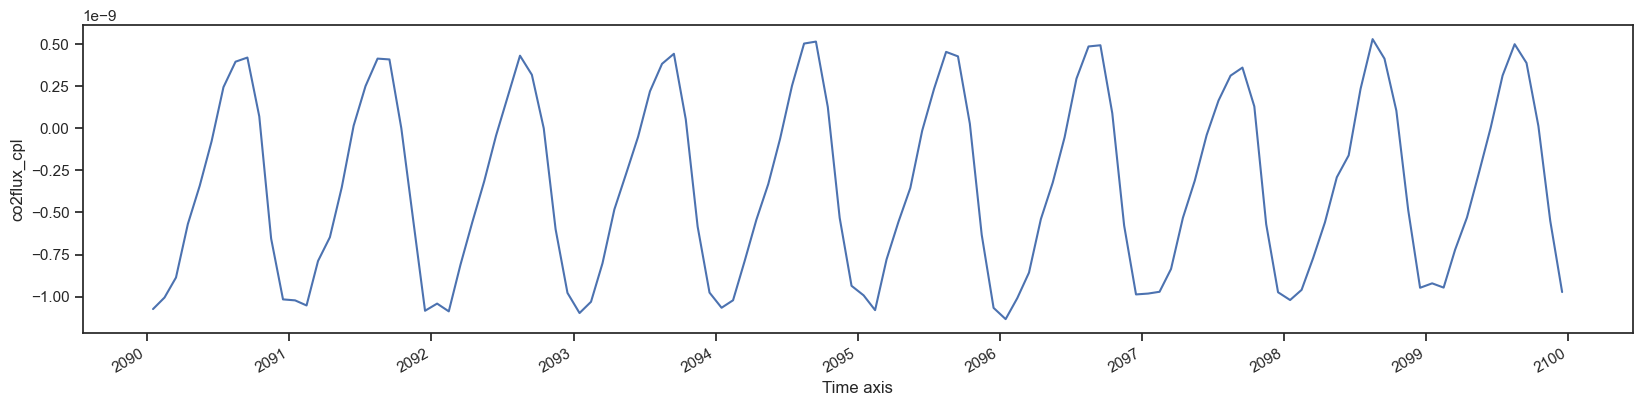

In [16]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

In [77]:
mean_array = ds_date_range.mean(dim='time_counter') # mean time

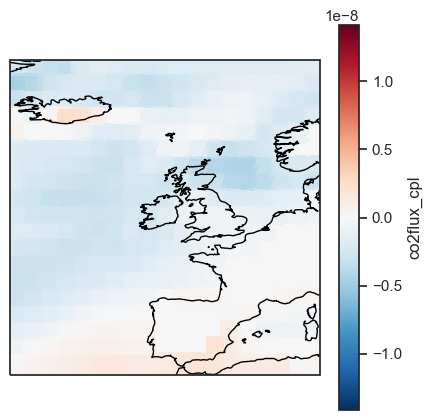

In [18]:
fig=plt.figure(figsize=(5,5), frameon=True) 

ax = plt.axes(projection=ccrs.PlateCarree())
mean_array.co2flux_cpl.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)

ax.coastlines(); 
ax.set_extent([-25, 10, 35, 70])

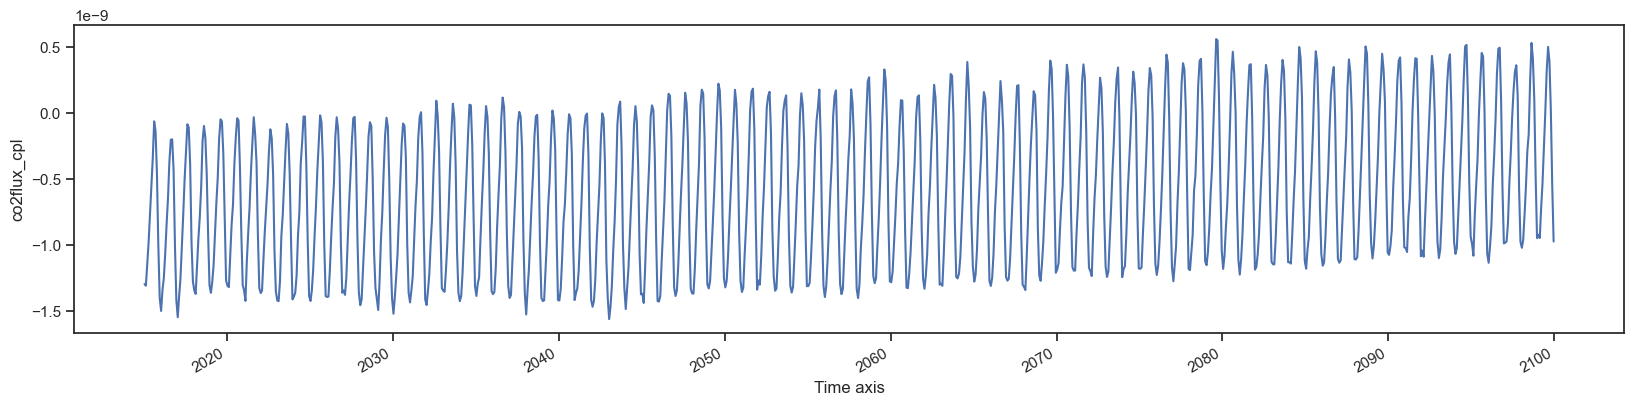

In [19]:
data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

In [20]:
sliced_data = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)

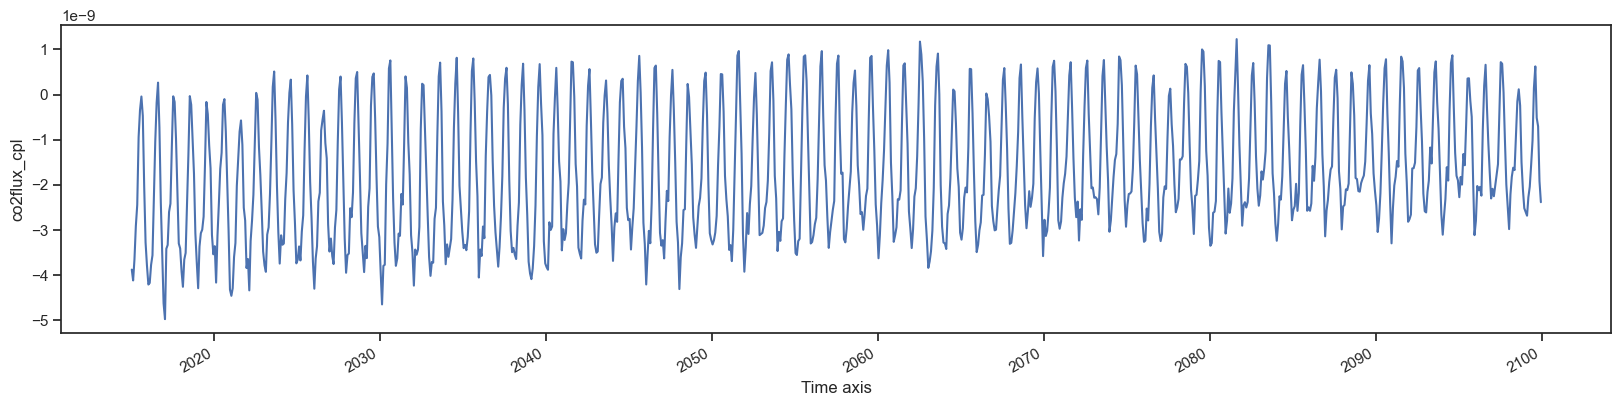

In [21]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean with OAE

In [22]:
df_sliced = sliced_data.to_dataframe()

Text(0.5, 1.02, 'CO2 flux')

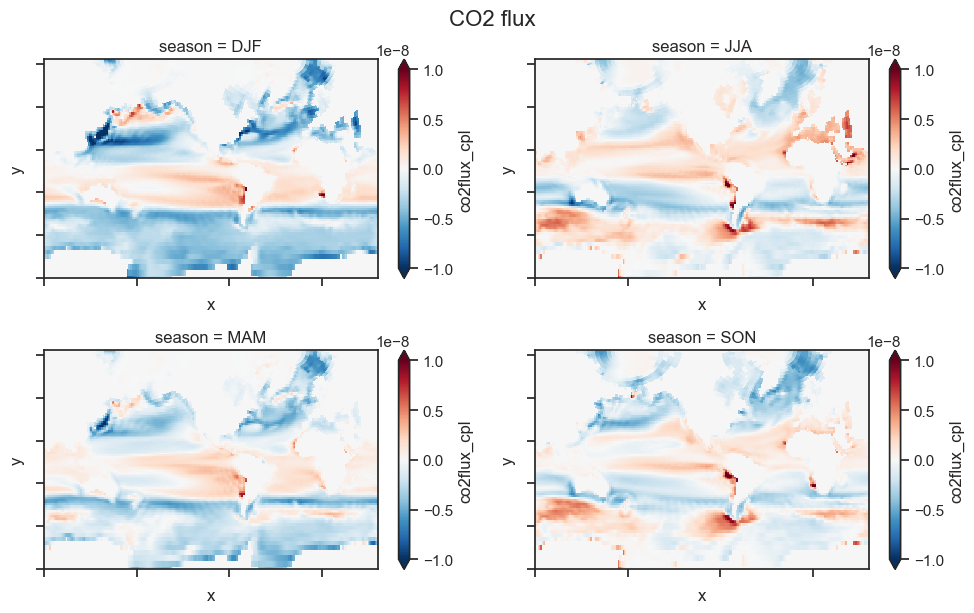

In [23]:
# global mean from 2015 to 2100

ds_season = data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

Text(0.5, 1.02, 'CO2 seasonal flux')

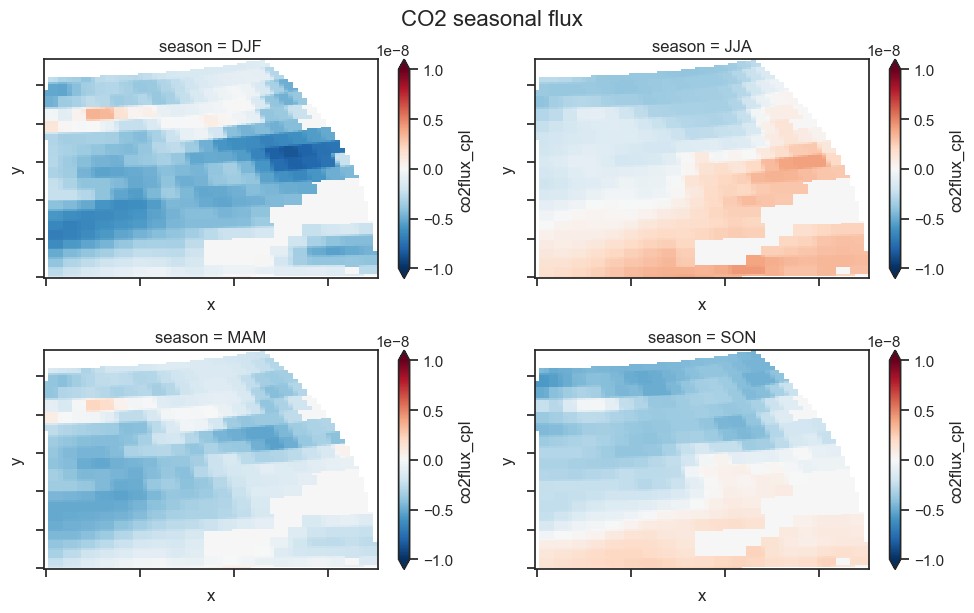

In [24]:
# regional mean from 2015 to 2100

ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 seasonal flux', fontsize=16, y=1.02)

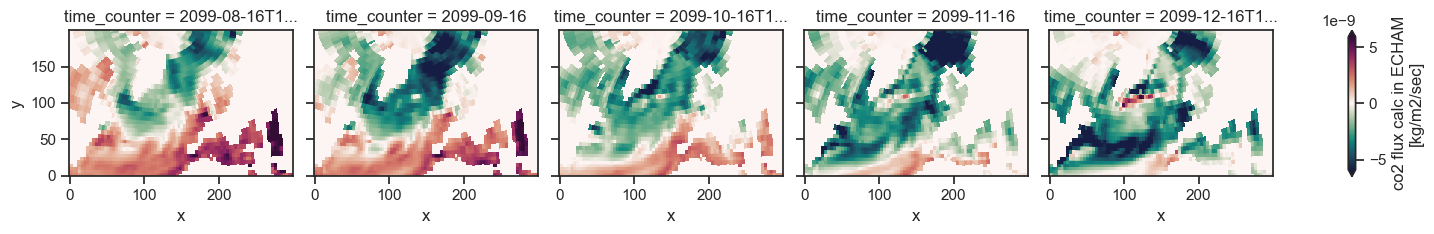

In [60]:
# last seven days of the simulation

ds = '/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/CO2flux_baseline_ensemble1_ssp126_1m.nc'

cmap = cmocean.cm.curl
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['co2flux_cpl'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)

In [27]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux = sliced_data["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [71]:
co2flux_season_summary = co2_flux.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years = co2_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean = co2flux_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


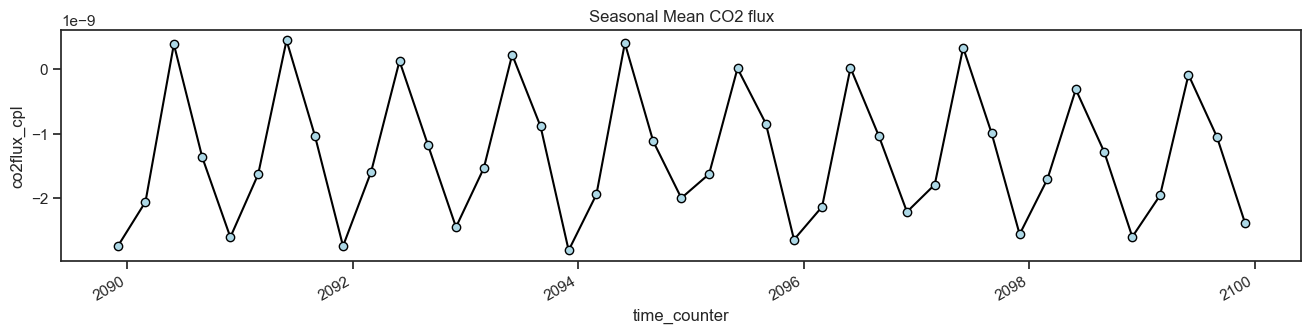

In [72]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_seasonal_mean.plot(marker="o",
                        color="black",
                        markerfacecolor="lightblue",
                        markeredgecolor="black")
ax.set(title="Seasonal Mean CO2 flux")
plt.show()

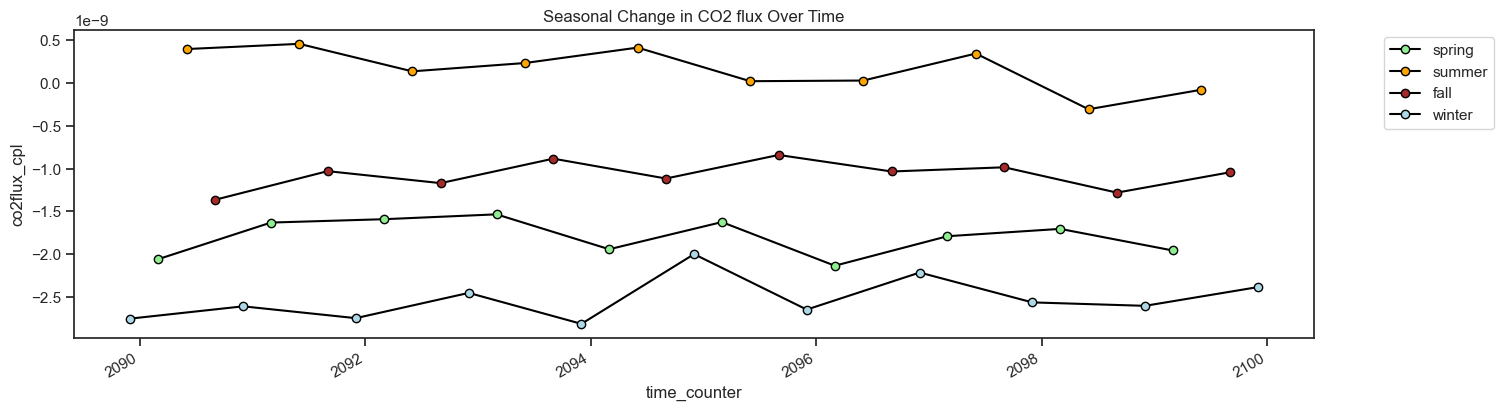

In [73]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in co2flux_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title = "Seasonal Change in CO2 flux Over Time")
plt.show()

In [33]:
sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

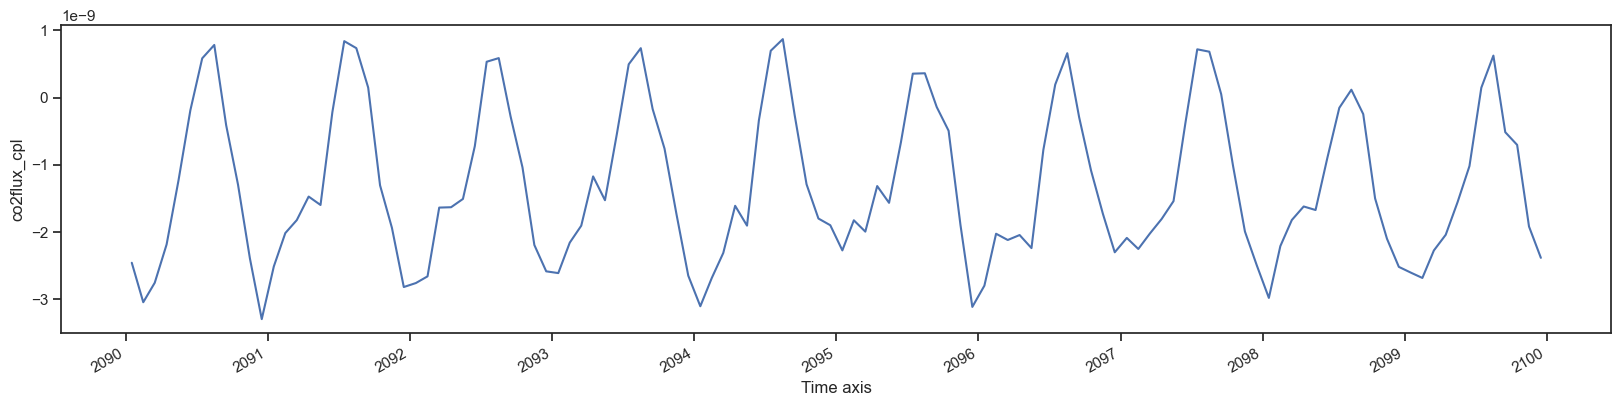

In [34]:
sliced_frame.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

Text(0.5, 1.02, 'CO2 seasonal flux')

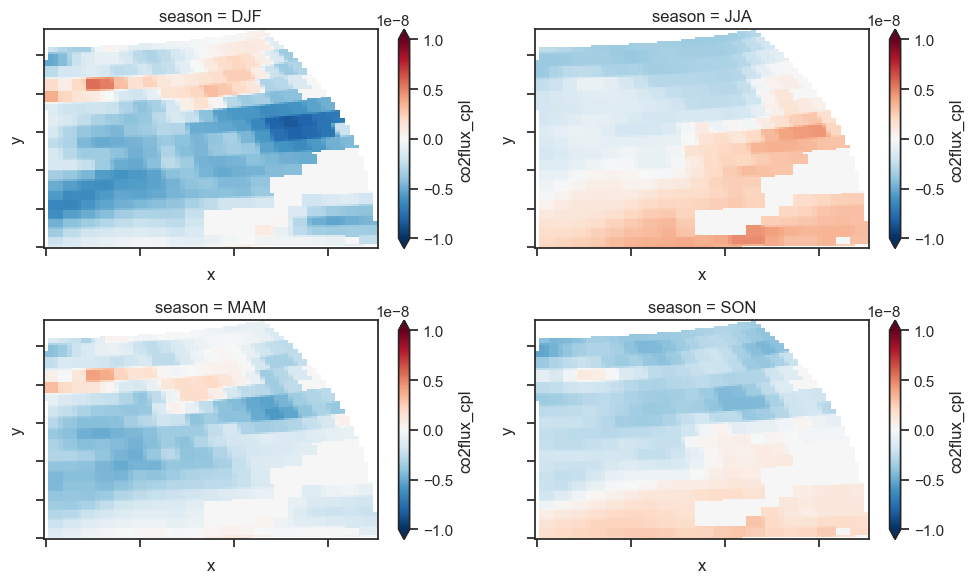

In [59]:
ds_season = sliced_frame.co2flux_cpl.groupby('time_counter.season').mean('time_counter')

fig_region, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 seasonal flux', fontsize=16, y=1.02)

In [36]:
df_baseline = sliced_frame.to_dataframe()

In [37]:
df_baseline_overview = df_baseline.describe()

In [38]:
df_baseline_overview.to_excel('co2flux_baseline_2090_2100_eu.xlsx')

In [74]:
month_length = co2_flux.time_counter.dt.days_in_month
co2flux_weighted_mean = ((co2_flux * month_length).resample(time_counter='QS-DEC').sum() / month_length.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean = co2flux_weighted_mean.where(co2flux_weighted_mean)
co2flux_weighted_season = co2flux_weighted_mean.groupby('time_counter').mean(["y", "x"])

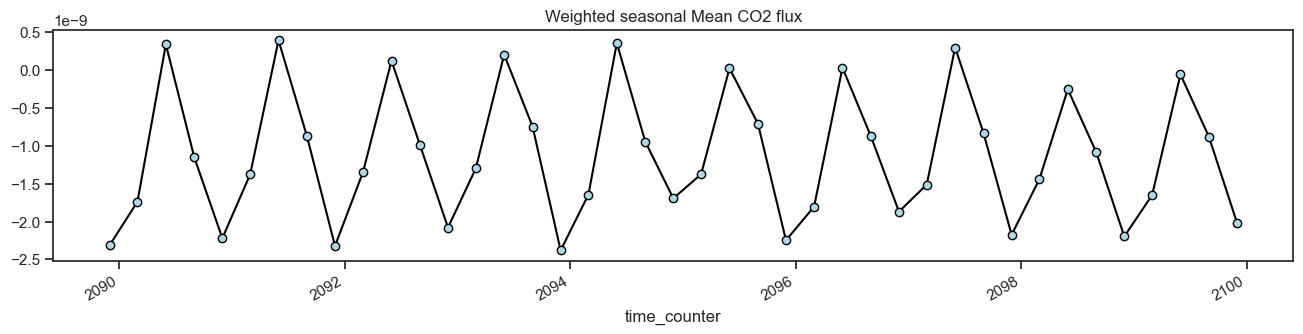

In [78]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_weighted_season_value.plot(marker="o",
                        color="black",
                        markerfacecolor=colors[month],
                        markeredgecolor="black", 
                        label=seasons[month])
ax.set(title="Weighted seasonal Mean CO2 flux")
plt.show()

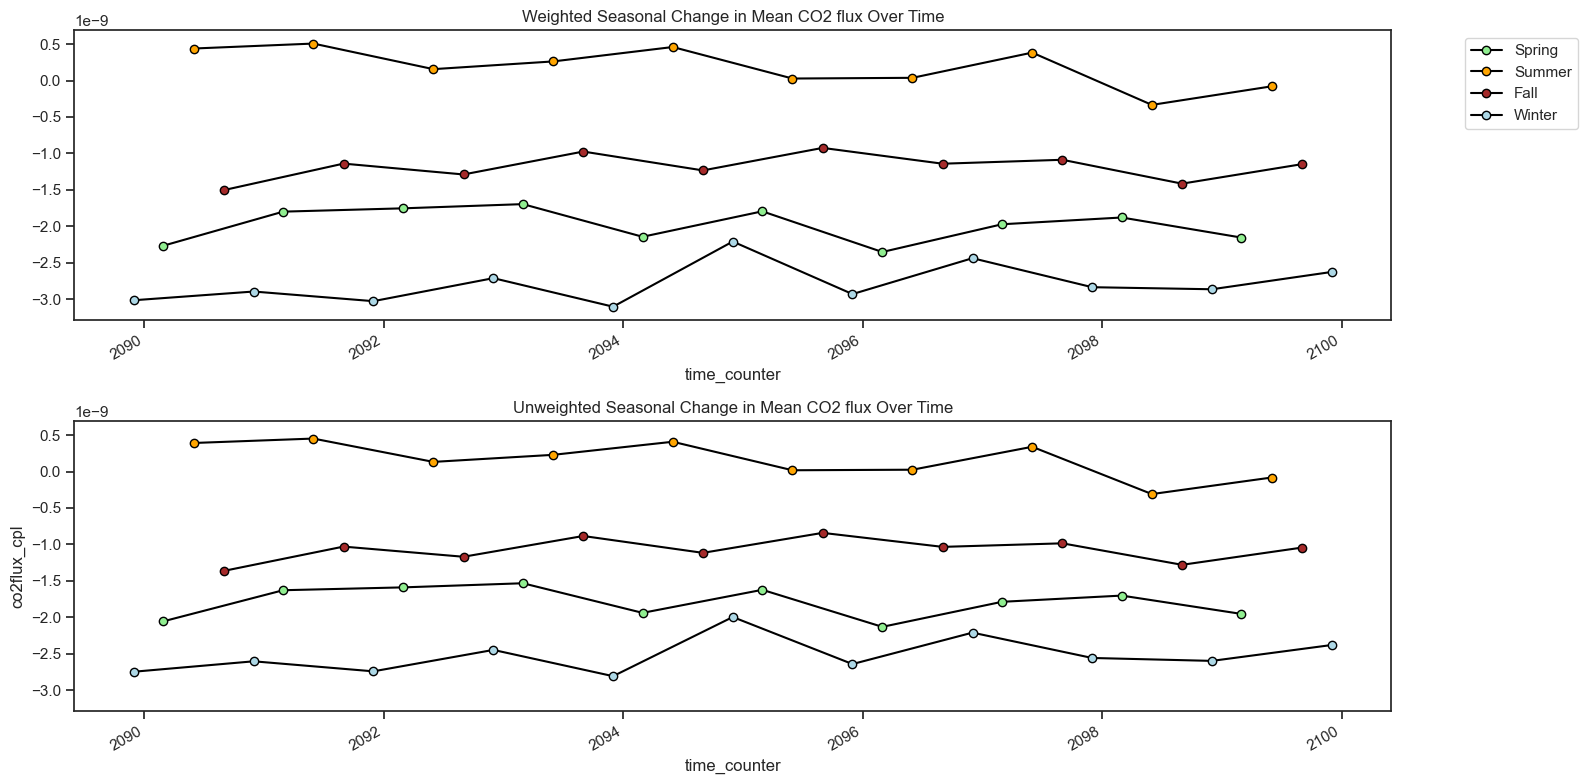

In [76]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=True)
for month, arr in co2flux_weighted_season.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set(title="Weighted Seasonal Change in Mean CO2 flux Over Time")

for month, arr in co2flux_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set(title="Unweighted Seasonal Change in Mean CO2 flux Over Time")
f.tight_layout()
plt.show()